<font face='Liberation serif' size=5>**Цель исследования:** выяснить, изменился ли игровой баланс после выпуска обновления игры</font>

<font face='liberation serif' size=3>***Для того, чтобы определить изменился ли баланс или нет необходимо выделить боевые сетапы (какое оружие и в какой последовательности используется в бою) и проверить среднее время боя до и после обновления. В зависимости от нормальности распределения мы используемые параметрические или непараметрические методы проверки гипотез о равенстве средних***</font>

<font face='Liberation serif' size=3>**Описание данных:**

- **battle_id:** идентификатор битвы;
- **unit_1:** первый боец (тип);
- **unit_2:** второй боец (тип);
- **unit_3:** третий боец (тип);
- **unit_4:** четвертый боец (тип);
- **len:** длительность боя;
- **balance_mark:** бой до или после обновления.
</font>

<font face='Liberation serif' size=4>**0. Готовимся к исследованию**</font>

<font face='Liberation serif' size=3>Загружаем библиотеки, необходимые для анализа</font>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

%matplotlib inline

<font face='Liberation serif' size=3>Настраиваем опции ноутбука</font>

In [2]:
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format  # настраиваем отображение цифр в таблицах (2 знака после запятой)
warnings.filterwarnings('ignore')  # отключаем warning-уведомления
plt.style.use('seaborn')  # стиль графиков
sns.set(style = 'darkgrid')  # стиль графиков для seaborn

<font face='Liberation serif' size=4>**1. Загружаем данные для анализа**</font>

<font face='Liberation serif' size=3>Для начала загружаем 100 строк из датасета для проверки корректности загрузки: нет проблем с кодировкой или разделителем</font>

In [3]:
df = pd.read_csv('/ya/data_test_2.csv', nrows=100)

<font face='Liberation serif' size=3>Смотрим на 10 случайных наблюдений из выборки - на первый взгляд проблем с данными не наблюдается</font>

In [4]:
df.sample(10)

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
62,107925,топор,меч,лук,посох,15.98,before
68,108238,булава,лук,булава,булава,18.88,before
72,119432,булава,меч,топор,лук,19.42,before
47,100739,лук,меч,меч,посох,22.39,before
40,112147,топор,меч,топор,булава,15.53,before
49,102707,булава,булава,посох,топор,17.93,before
28,100748,меч,меч,булава,меч,15.59,before
35,118240,булава,меч,посох,булава,16.28,before
98,116272,лук,булава,лук,лук,23.35,before
39,103688,меч,меч,булава,меч,18.79,before


<font face='Liberation serif' size=3>Загружаем датасет целиком</font>

In [5]:
df = pd.read_csv('/ya/data_test_2.csv')

In [6]:
print(f'Итого имеем {df.shape[0]} наблюдений с {df.shape[1]} признаками')

Итого имеем 20000 наблюдений с 7 признаками


<font face='Liberation serif' size=3>Изучаем загруженные данные</font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   battle_id     20000 non-null  int64  
 1   unit_1        20000 non-null  object 
 2   unit_2        20000 non-null  object 
 3   unit_3        20000 non-null  object 
 4   unit_4        20000 non-null  object 
 5   len           20000 non-null  float64
 6   balance_mark  20000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


<font face='Liberation serif' size=3>Имеем 5 столбцов со строковыми данными и 2 столбца с цифрами</font>

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
battle_id,"20,000.00",NaN,NaN,NaN,"110,000.05","5,774.08","100,000.00","104,999.75","110,000.50","115,000.25","120,000.00"
unit_1,20000,5,меч,4053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_2,20000,5,булава,4131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_3,20000,5,булава,4068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_4,20000,5,лук,4107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len,"20,000.00",NaN,NaN,NaN,22.05,3.96,5.01,19.38,22.11,24.63,30.00
balance_mark,20000,2,before,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font face='Liberation serif' size=3>Смотрим на пропуски и дубликаты в датасете</font>

In [9]:
df.isna().sum()

battle_id       0
unit_1          0
unit_2          0
unit_3          0
unit_4          0
len             0
balance_mark    0
dtype: int64

In [10]:
df.duplicated().sum()

0

<font face='Liberation serif' size=3>Пропусков и дубликатов нет</font>

In [11]:
df.describe(include='all')

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
count,"20,000.00",20000,20000,20000,20000,"20,000.00",20000
unique,NaN,5,5,5,5,NaN,2
top,NaN,меч,булава,булава,лук,NaN,before
freq,NaN,4053,4131,4068,4107,NaN,10000
mean,"110,000.05",NaN,NaN,NaN,NaN,22.05,NaN
std,"5,774.08",NaN,NaN,NaN,NaN,3.96,NaN
min,"100,000.00",NaN,NaN,NaN,NaN,5.01,NaN
25%,"104,999.75",NaN,NaN,NaN,NaN,19.38,NaN
50%,"110,000.50",NaN,NaN,NaN,NaN,22.11,NaN
75%,"115,000.25",NaN,NaN,NaN,NaN,24.63,NaN


<font face='Liberation serif' size=3>Явных проблем с данными не видно</font>

<font face='Liberation serif' size=3>**2. Подготовим датасет для анализа**</font>

<font face='Liberation serif' size=3>Посмотрим на типы оружия</font>

In [12]:
print(*df.unit_1.unique().tolist(), sep='\n')

топор
посох
меч
булава
лук


<font face='Liberation serif' size=3>Создадим отдельный столбец с сетапами (выбор типов воинов и их расположение в бою)</font>

<font face='Liberation serif' size=3>Сетап будет в виде четырех заглавных букв оружия, например, ББЛМ - булава, булава, лук, меч</font>

In [13]:
df['setup'] = df.unit_1.str[0] + df.unit_2.str[0] + df.unit_3.str[0] + df.unit_4.str[0]

In [14]:
df.setup = df.setup.apply(lambda row: ''.join(sorted(row)).upper())

<font face='Liberation serif' size=3>Проверим, что получилось</font>

In [15]:
df.sample(5)

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,setup
4573,105176,топор,меч,булава,посох,23.96,before,БМПТ
2181,117662,топор,топор,булава,меч,21.29,before,БМТТ
11244,100640,меч,булава,булава,булава,21.09,after,БББМ
77,111822,меч,булава,топор,меч,18.66,before,БММТ
4118,118121,булава,лук,булава,топор,23.43,before,ББЛТ


<font face='Liberation serif' size=3>Новый столбец с сетапами в том виде, который необходим, присутствует</font>

<font face='Liberation serif' size=3>Разбиваем данные на две группы: до и после обновления</font>

In [16]:
before = df.query("balance_mark == 'before'")
after = df.query("balance_mark == 'after'")

<font face='Liberation serif' size=3>Смотрим на среднее</font>

In [17]:
print(f'Среднее время боя по датасету: {df.len.mean():.2f} секунд')
print(f'Среднее время боя до изменений оружия: {before.len.mean():.2f} секунд')
print(f'Среднее время боя после изменений оружия: {after.len.mean():.2f} секунд')

Среднее время боя по датасету: 22.05 секунд
Среднее время боя до изменений оружия: 19.97 секунд
Среднее время боя после изменений оружия: 24.12 секунд


<font face='Liberation serif' size=3>Есть подозрение, что оружие стало более слабым - время боя увеличилось</font>

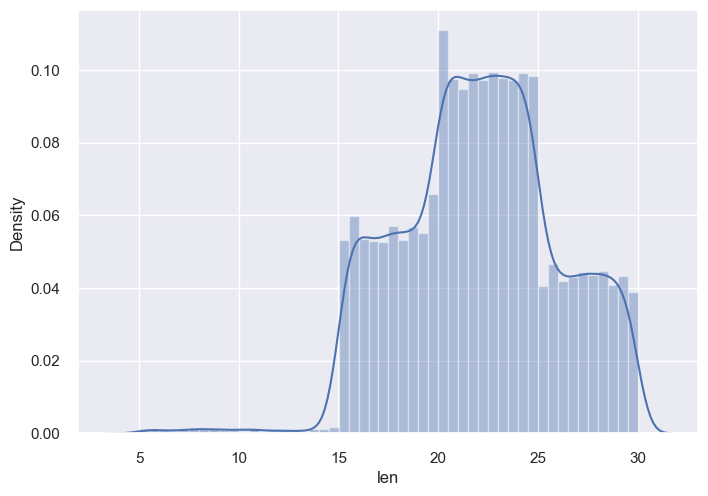

In [18]:
sns.distplot(df.len);

<font face='Liberation serif' size=3>Слева есть хвост - бои длительностью от 5 до 15 секунд</font>

In [19]:
np.percentile(df.len, [1, 5, 25, 75, 95, 99])

array([15.01  , 15.72  , 19.3775, 24.63  , 28.76  , 29.74  ])

In [20]:
print(f'Минимальное время игры: {df.len.min()}\nМаксимальное время игры: {df.len.max()}')

Минимальное время игры: 5.01
Максимальное время игры: 30.0


<font face='Liberation serif' size=3>Отрисуем распределение длительности боев до и после</font>

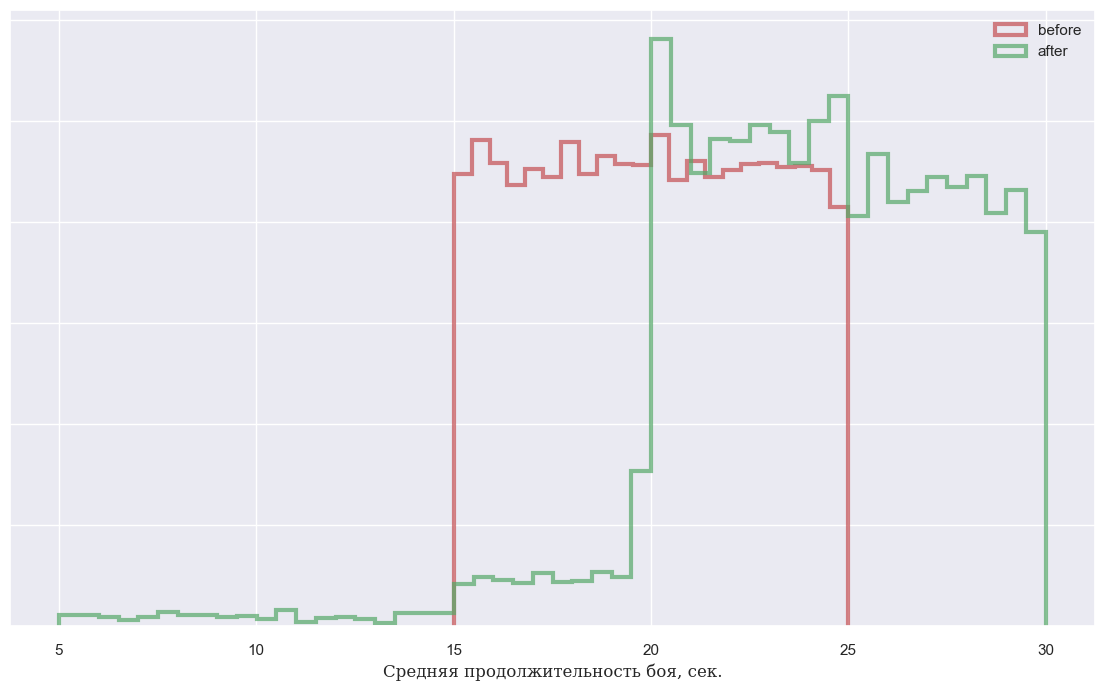

In [21]:
fig = plt.figure(figsize=(14, 8))

ax = sns.distplot(before.len, label='before', kde=False,
                  hist_kws={"histtype": "step", "linewidth": 3, "alpha": .7, "color": "r"})

ax = sns.distplot(after.len, label='after', kde=False,
                  hist_kws={"histtype": "step", "linewidth": 3, "alpha": .7, "color": "g"})

ax.set_yticklabels([])
plt.xlabel('Средняя продолжительность боя, сек.', {'family': 'serif', 'weight': 'normal', 'size': 12})
plt.legend()
plt.show()

<font face='Liberation serif' size=3>До смены баланса все бои протекали от 15 до 25 секунд. Теперь ж появился хвост из пятисекундных боев и прошел сдвиг времени до 20-30 секунд.   
До обновления все бои укладывались в промежуток от 15 до 25 секунд. После смены баланса время боев сместилось в промежуток от 20 до 30 секунд и появились бои с длительностью от 15 секунд - скорее всего появилась дисбалансный сетап или оружиие, которую нашли пользователи - этот момент необходимо устранить, так как это повлияет на качество боев в игре в целом - все будут использовать "читерские" сетапы.</font>

In [22]:
np.percentile(after.len, [1, 5, 95, 99])

array([ 9.9293, 18.3895, 29.37  , 29.86  ])

In [23]:
np.percentile(before.len, [1, 5, 95, 99])

array([15.1 , 15.51, 24.47, 24.91])

<font face='Liberation serif' size=3>Выделим все возможные способы проведения боев</font>

In [24]:
setups = df.setup.unique()

In [25]:
len(setups)

70

<font face='Liberation serif' size=3>Всего имеем 70 вариантов компоновки строя</font>

<font face='Liberation serif' size=3>Проверим поменялось ли среднее время боя</font>

<font face='liberation serif' size=3>   
    
- **Нулевая гипотеза:** среднее время боя после обновления не отличается (баланс сохранен)   
- **Альтернативная гипотеза:** Среднее время боя после обновления отличается (баланс поменялся)
</font>

<font face='Liberation serif' size=3>Статистическая значимость - 5 процентов</font>

In [26]:
alpha = .05

<font face='Liberation serif' size=3>На печать выведем только те сетапы, где не получилось отвергнуть теории о равенстве средних</font>

<font face='Liberation serif' size=3>Проверяем непараметрическим методом, так как распределение ненормальное</font>

In [27]:
negatives = []
for var in setups:
    stat, pmu = st.mannwhitneyu(before.query("setup == @var")['len'].tolist(), after.query("setup == @var")['len'].tolist(), alternative='two-sided')
    if (pmu > alpha):
        print('\n', var)
        print("Не получилось отвергнуть нулевую гипотезу")
        negatives.append(var)
    else:
        continue


 БТТТ
Не получилось отвергнуть нулевую гипотезу

 ММТТ
Не получилось отвергнуть нулевую гипотезу

 БММТ
Не получилось отвергнуть нулевую гипотезу

 БМММ
Не получилось отвергнуть нулевую гипотезу

 БМТТ
Не получилось отвергнуть нулевую гипотезу

 БББМ
Не получилось отвергнуть нулевую гипотезу

 ББММ
Не получилось отвергнуть нулевую гипотезу

 ББТТ
Не получилось отвергнуть нулевую гипотезу

 МММТ
Не получилось отвергнуть нулевую гипотезу

 ББББ
Не получилось отвергнуть нулевую гипотезу

 БББТ
Не получилось отвергнуть нулевую гипотезу

 МТТТ
Не получилось отвергнуть нулевую гипотезу

 ТТТТ
Не получилось отвергнуть нулевую гипотезу


In [28]:
test = df.query('setup in @negatives')

In [29]:
test.setup.nunique()

13

In [30]:
print(test.setup.unique().tolist())

['БТТТ', 'ММТТ', 'БММТ', 'БМММ', 'БМТТ', 'БББМ', 'ББММ', 'ББТТ', 'МММТ', 'ББББ', 'БББТ', 'МТТТ', 'ТТТТ']


<font face='Liberation serif' size=3>Судя по сетапам баланс не изменился для топоров, мечей и булав - в этих сетапах гипотеза о равенстве средних подтвердилась</font>

<font face='Liberation serif' size=3>Почистим данные от выбросов (оставим данные от 1 до 99 перцентиля)</font>

In [31]:
before = before.query('15.1 <= len <= 24.91')
after = after.query('9.93 <= len <= 29.86')

In [32]:
for var in setups:
    stat, pmu = st.mannwhitneyu(before.query("setup == @var")['len'].tolist(), after.query("setup == @var")['len'].tolist(), alternative='two-sided')
    if (pmu > alpha):
        print('\n', var)
        print("Не получилось отвергнуть нулевую гипотезу")
    else:
        continue


 БТТТ
Не получилось отвергнуть нулевую гипотезу

 ММТТ
Не получилось отвергнуть нулевую гипотезу

 БММТ
Не получилось отвергнуть нулевую гипотезу

 БМММ
Не получилось отвергнуть нулевую гипотезу

 БМТТ
Не получилось отвергнуть нулевую гипотезу

 БББМ
Не получилось отвергнуть нулевую гипотезу

 ББММ
Не получилось отвергнуть нулевую гипотезу

 ББТТ
Не получилось отвергнуть нулевую гипотезу

 МММТ
Не получилось отвергнуть нулевую гипотезу

 ББББ
Не получилось отвергнуть нулевую гипотезу

 БББТ
Не получилось отвергнуть нулевую гипотезу

 МТТТ
Не получилось отвергнуть нулевую гипотезу

 ТТТТ
Не получилось отвергнуть нулевую гипотезу


<font face='Liberation serif' size=3>Все без изменений - остались те же самые сетапы</font>

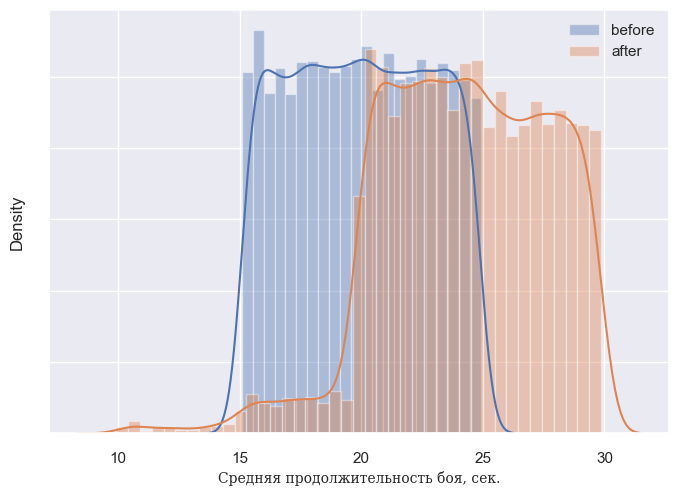

In [33]:
ax = sns.distplot(before.len, label='before')
ax = sns.distplot(after.len, label='after')

ax.set_yticklabels([])
plt.xlabel('Средняя продолжительность боя, сек.', {'family': 'serif', 'size': 10})
plt.legend()
plt.show()

In [34]:
df.query('len < 10').setup.unique()

array(['ББМТ'], dtype=object)

<font face='liberation serif' size=3>Похоже найдена читерская связка: данных маловато, чтобы понять что это: косяк или все таки чит, но факт остается фактом - после обновления появились бои менее 10 секунд и все с этой связкой.   
Можно просмотреть логи боев и понять, что произошло - поменялось взаимодействие между оружием или какой то новый навык или совместный навык, который проявляется в этой связке - в датасете данных подобного рода нет, поэтому необходимо доисследование</font>

<font face='Liberation serif' size=3>Добавим тест Стьюдента</font>

In [35]:
for var in setups:
    
    results = st.ttest_ind(before.query("setup == @var")['len'].tolist(), after.query("setup == @var")['len'].tolist(), equal_var = False)
    if (results.pvalue > alpha):
        print('\n', var)
        print('p-значение:', results.pvalue)
        print('Время до: {:.2f}, время после: {:.2f}'.format(np.mean(before.query("setup == @var")['len'].tolist()),\
                                                 np.mean(after.query("setup == @var")['len'].tolist())))
        print("Не получилось отвергнуть нулевую гипотезу")
    else:
        continue


 БТТТ
p-значение: 0.684385353420031
Время до: 20.31, время после: 20.09
Не получилось отвергнуть нулевую гипотезу

 ММТТ
p-значение: 0.9396197947130578
Время до: 19.92, время после: 19.95
Не получилось отвергнуть нулевую гипотезу

 БММТ
p-значение: 0.14173333744212976
Время до: 19.69, время после: 20.00
Не получилось отвергнуть нулевую гипотезу

 БМММ
p-значение: 0.5548697930152775
Время до: 20.05, время после: 19.76
Не получилось отвергнуть нулевую гипотезу

 БМТТ
p-значение: 0.9119790374133985
Время до: 20.04, время после: 20.08
Не получилось отвергнуть нулевую гипотезу

 БББМ
p-значение: 0.9252819004151158
Время до: 20.05, время после: 20.10
Не получилось отвергнуть нулевую гипотезу

 ББММ
p-значение: 0.8150678826190507
Время до: 20.09, время после: 20.00
Не получилось отвергнуть нулевую гипотезу

 ББТТ
p-значение: 0.6764696004778307
Время до: 20.05, время после: 20.22
Не получилось отвергнуть нулевую гипотезу

 МММТ
p-значение: 0.9377124493678176
Время до: 20.22, время после: 20.2

<font face='Liberation serif' size=3>Те же самые 13 сетапов</font>

<font face='Liberation serif' size=3>**Вывод:** в любом случае после обновления баланс игры поменялся. Даже несмотря на то что для трех оружий не удалось отвергнуть гипотезу о равенстве средних, распределение по времени боя сместилось на 5 секунд в плюс, а также появилась связка при которой бой идет 5-10 секунд.</font>

<font face='Liberation serif' size=3>Уберем читеров из данных</font>

In [36]:
df = df.query("setup !='ББМТ'")

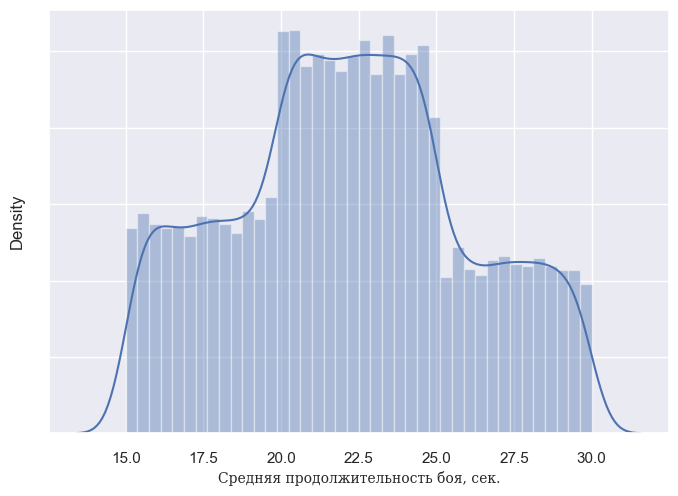

In [37]:
ax=sns.distplot(df.len)
ax.set_yticklabels([])
plt.xlabel('Средняя продолжительность боя, сек.', {'family': 'serif', 'size': 10})
plt.show()

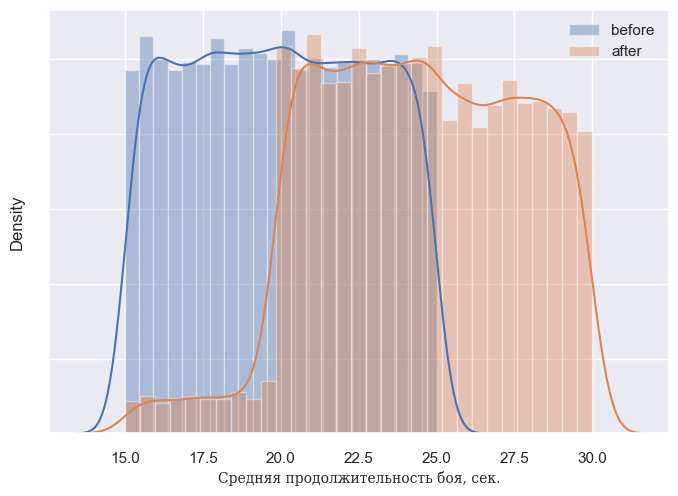

In [38]:
ax = sns.distplot(df.query("balance_mark=='before'").len, label='before')
ax = sns.distplot(df.query("balance_mark=='after'").len, label='after')
ax.set_yticklabels([])
plt.xlabel('Средняя продолжительность боя, сек.', {'family': 'serif', 'size': 10})
plt.legend()
plt.show()

<font face='Liberation serif' size=3>Итого видим, что теперь от 15 до 20 секунд длится намного меньше боев, чем до обновления, и верхняя планка боев подросла до 30 секунд. То есть оружие стало послабее - бои длятся дольше.</font>

<font face='liberation serif' size=4>**ВЫВОДЫ ПО ИССЛЕДОВАНИЮ:**</font>

<font face='liberation serif' size=3>
    
- баланс сил не изменился для 13 сетапов из 70;
    
- оружие стало менее сильным - время боя выросло с 15-25 секунд до 20-30 секунд;
    
- появилась читерская связка, при использовании которой время боя составляет 5-15 секунд.
    
В целом можно сделать вывод, что баланс игры поменялся + необходимо исправить читерскую связку
</font>